<a href="https://colab.research.google.com/github/yongbin02/AI/blob/main/4%EC%A3%BC%EC%B0%A8/white_wine_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import layers, models

In [35]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI/data/winequality-white.csv", delimiter=';').dropna()

In [36]:
# 데이터 라벨링
# 7점 이상 -> 좋은 와인(1) / 6점 이하 -> 보통 와인(0)
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6 else 0)
print("라벨링 방식: 이진 분류 (0: 보통 와인, 1: 좋은 와인)")

# 데이터 라벨링 이후 분포 확인
print(df['quality'].value_counts())
print("\n")

라벨링 방식: 이진 분류 (0: 보통 와인, 1: 좋은 와인)
quality
0    3838
1    1060
Name: count, dtype: int64




## 데이터 준비

In [37]:
# 스케일링 진행
scaler = StandardScaler()
X = scaler.fit_transform(X)

# one-hot encoding 방식으로 변경
Y = pd.get_dummies(y).values

# 데이터 분리
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [39]:
# 독립변수 및 종속변수 분리
X = df.drop(columns=["quality"])
y = df["quality"]

## 딥러닝 모델 구축

In [40]:
model = models.Sequential([
    # 1번 층: 64개의 뉴런을 가진 입력층. 활성화 함수는 'relu'
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    # 과적합 방지를 위해 30%의 뉴런을 랜덤하게 끔 (학습 방해)
    layers.Dropout(0.3),
    # 2번 층: 32개의 뉴런을 가진 은닉층.
    layers.Dense(32, activation="relu"),
    # 3번 층: 최종 결과를 0 또는 1로 출력하는 출력층. 활성화 함수는 'softmax'
    layers.Dense(Y.shape[1], activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 모델 학습 설정

In [41]:
model.compile(
    optimizer="adam",                  # 최적화 도구
    loss="categorical_crossentropy",   # 오차 측정 방법
    metrics=["accuracy"]               # 평가 기준 (정확도)
)

## 모델 훈련

In [42]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,   # 훈련 중 성능 검증을 위해 20%를 따로 떼어놓음
    epochs=50,              # 전체 데이터를 총 50번 반복 학습
    batch_size=16,          # 16개 데이터마다 한 번씩 정답과 비교하며 업데이트
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7483 - loss: 0.5057 - val_accuracy: 0.8099 - val_loss: 0.4007
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.4261 - val_accuracy: 0.8316 - val_loss: 0.3719
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8130 - loss: 0.3807 - val_accuracy: 0.8240 - val_loss: 0.3630
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8191 - loss: 0.3829 - val_accuracy: 0.8380 - val_loss: 0.3550
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8199 - loss: 0.3776 - val_accuracy: 0.8355 - val_loss: 0.3582
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8043 - loss: 0.3998 - val_accuracy: 0.8329 - val_loss: 0.3528
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8255 - loss: 0.3760 - val_accuracy: 0.8418 - val_loss: 0.3505
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8086 - loss: 0.3902 - val_accuracy: 0.

## 학습 과정 시각화

In [43]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


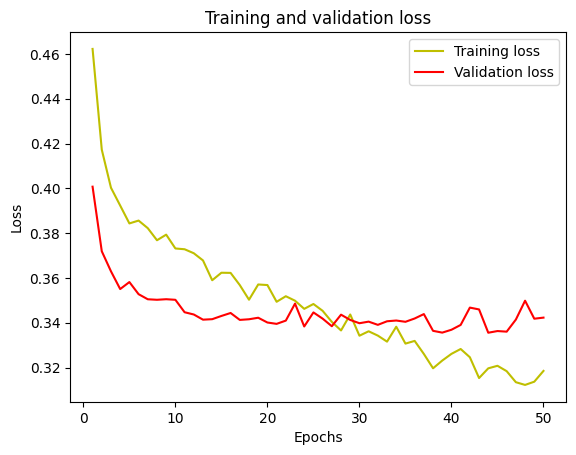

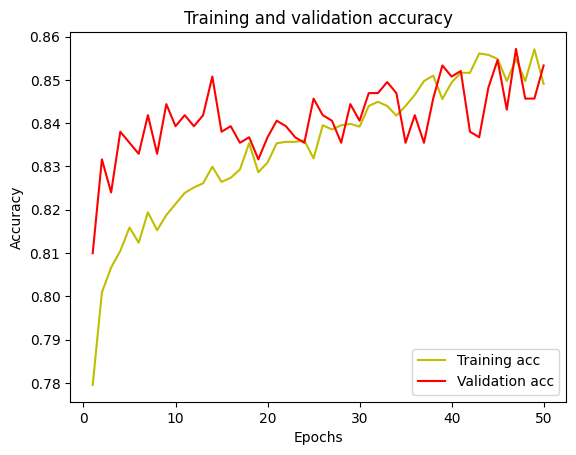

In [44]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 최종 성능 평가

In [46]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       764
           1       0.60      0.43      0.50       216

    accuracy                           0.81       980
   macro avg       0.73      0.67      0.69       980
weighted avg       0.80      0.81      0.80       980

[[703  61]
 [124  92]]
